<span style="font-size:3em; line-height:36px"><strong>Natural Language Processing with Python
</strong></span>
## Steven Bird, Ewan Klein, and Edward Loper

#### [NOTE] 

이 문서에 나오는 모든 텍스트와 코드는 Steven Bird, Ewan Klein, and Edward Loper의 저서, "Natural Language Processing with Python – Analyzing Text with the Natural Language Toolkit"에서 가져와 일부는 번역하고 일부는 원문 그대로 옮겨 적은 것이다. 또한 내용 중 일부는 교육 목적으로 요약하거나 첨삭하였으나, 원작자의 권리에는 변함이 없음을 알려둔다. 본 자료에 대한 모든 권리는 원작자에게 있음을 알린다.
원래 자료는 https://www.nltk.org/book/ 에서 볼 수 있다.

The following text and code are from the book, "Natural Language Processing with Python – Analyzing Text with the Natural Language Toolkit" by Steven Bird, Ewan Klein, and Edward Loper.
Please note that we have tried to keep the original content as much as possible, and have only modified or translated the content as necessary for teaching purposes.
You can find the original content from: https://www.nltk.org/book/

## Software Requirements

|    |    |
|:----------|:----------------------------------------------------------------------------------|
|**Python:**    |The material presented in this book assumes that you are using Python version 3.2 or later. (Note that NLTK 3.0 also works with Python 2.6 and 2.7.)|
|**NLTK:**|The code examples in this book use NLTK version 3.0. Subsequent releases of NLTK will be backward-compatible with NLTK 3.0.|
|**NLTK-Data:**|This contains the linguistic corpora that are analyzed and processed in the book.|
|**NumPy:**|(recommended) This is a scientific computing library with support for multidimensional arrays and linear algebra, required for certain probability, tagging, clustering, and classification tasks.|
|**Matplotlib:**|(recommended) This is a 2D plotting library for data visualization, and is used in some of the book's code samples that produce line graphs and bar charts.|
|**Stanford NLP Tools:**|(recommended) NLTK includes interfaces to the Stanford NLP Tools which are useful for large scale language processing (see http://nlp.stanford.edu/software/).|
|**NetworkX:**|(optional) This is a library for storing and manipulating network structures consisting of nodes and edges. For visualizing semantic networks, also install the Graphviz library.|
|**Prover9:**|(optional) This is an automated theorem prover for first-order and equational logic, used to support inference in language processing.|

# Natural Language Toolkit (NLTK)

| Language processing task   | NLTK modules           | Functionality |
|:---------------------------|:-----------------------|:--------------|
| Accessing corpora          | corpus                 | standardized interfaces to corpora and lexicons              |
| String processing          | tokenize, stem         | tokenizers, sentence tokenizers, stemmers                    |
| Collocation discovery      | collocations           | t-test, chi-squared, point-wise mutual information           |
| Part-of-speech tagging     | tag                    | n-gram, backoff, Brill, HMM, TnT                             |
| Machine learning           | classify, cluster, tbl | decision tree, maximum entropy, naive Bayes, EM, k-means     |
| Chunking                   | chunk                  | regular expression, n-gram, named-entity                     |
| Parsing                    | parse, ccg             | chart, feature-based, unification, probabilistic, dependency |
| Semantic interpretation    | sem, inference         | lambda calculus, first-order logic, model checking           |
| Evaluation metrics         | metrics                | precision, recall, agreement coefficients                    |
| Probability and estimation | probability            | frequency distributions, smoothed probability distributions  |
| Applications               | app, chat              | graphical concordancer, parsers, WordNet browser, chatbots   |
| Linguistic fieldwork       | toolbox                | manipulate data in SIL Toolbox format                        |

### Startup Codes

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80
             % !important; }</style>"))
%matplotlib inline 

SyntaxError: EOL while scanning string literal (Temp/ipykernel_29332/3389428549.py, line 2)

<br>
<br>
<span style="font-size:3em; line-height:36px"><strong>Chapter 2. <br><br> Accessing Text Corpora and Lexical Resources
</strong></span>
<br>
<br>

NLP의 실무적 작업은 보통 대규모의 언어학적 데이터 즉, 코포라(corpora; 말뭉치)를 사용한다.
이 장의 목표는 다음과 같은 질문에 답을 하는 것이다:
- 유용한 텍스트 말뭉치와 어휘 자원으로는 어떤 것들이 있는지, 그리고 Python에서 그것들을 어떻게 사용하는지?
- 이러한 작업을 위해 Python의 어떤 라이브러리/패키지가 가장 도움이 되는가?
- Python code를 작성하면서 같은 일을 반복하지 않으려면 어떻게 해야 하는가?

<br><br>
<span style="font-size:2.5em; line-height:36px"><strong>1. Accessing Text Corpora
</strong></span>
<br><br>

# 1.1   Gutenberg Corpus

NLTK includes a small selection of texts from the [Project Gutenberg electronic text archive](http://www.gutenberg.org/) contains some 25,000 free electronic books.

In [3]:
import nltk
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
len(emma)

192427

### concordances
다른 절차가 필요하다

In [5]:
emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
emma.concordance("surprize")

Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

- `import nltk` 만 사용하면 `nltk.corpus.gutenberg.fileids()`처럼 입력시킬 코드가 길어져서 귀찮다...
- 다음과 같은 방법을 사용하자.

In [6]:
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [8]:
emma = gutenberg.words('austen-emma.txt')

여러가지 정보와 통계량을 읽고 계산해보기
- 평균 단어 길이
- 평균 문장 길이
- 어휘 내 각 단어의 평균 출현 회수

In [9]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid)) # whitespace 등 모든 글자가 포함됨
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


In [10]:
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')
macbeth_sentences

[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

In [11]:
macbeth_sentences[1116]

['Double',
 ',',
 'double',
 ',',
 'toile',
 'and',
 'trouble',
 ';',
 'Fire',
 'burne',
 ',',
 'and',
 'Cauldron',
 'bubble']

In [12]:
longest_len = max(len(s) for s in macbeth_sentences)
[s for s in macbeth_sentences if len(s) == longest_len]

[['Doubtfull',
  'it',
  'stood',
  ',',
  'As',
  'two',
  'spent',
  'Swimmers',
  ',',
  'that',
  'doe',
  'cling',
  'together',
  ',',
  'And',
  'choake',
  'their',
  'Art',
  ':',
  'The',
  'mercilesse',
  'Macdonwald',
  '(',
  'Worthie',
  'to',
  'be',
  'a',
  'Rebell',
  ',',
  'for',
  'to',
  'that',
  'The',
  'multiplying',
  'Villanies',
  'of',
  'Nature',
  'Doe',
  'swarme',
  'vpon',
  'him',
  ')',
  'from',
  'the',
  'Westerne',
  'Isles',
  'Of',
  'Kernes',
  'and',
  'Gallowgrosses',
  'is',
  'supply',
  "'",
  'd',
  ',',
  'And',
  'Fortune',
  'on',
  'his',
  'damned',
  'Quarry',
  'smiling',
  ',',
  'Shew',
  "'",
  'd',
  'like',
  'a',
  'Rebells',
  'Whore',
  ':',
  'but',
  'all',
  "'",
  's',
  'too',
  'weake',
  ':',
  'For',
  'braue',
  'Macbeth',
  '(',
  'well',
  'hee',
  'deserues',
  'that',
  'Name',
  ')',
  'Disdayning',
  'Fortune',
  ',',
  'with',
  'his',
  'brandisht',
  'Steele',
  ',',
  'Which',
  'smoak',
  "'",
  'd',
 

# 1.2 Web and Chat Text

Project Gutenberg가 수천권의 책을 포함하고 있다고 하지만, 이 책들은 기존의 잘 정립된 문헌을 대표한다. 비정형적인 언어를 고려하는 것이 중요하다. NLTK의 web text는 firefox의 토론방, 뉴욕에서의 대화, 캐리비언의 해적 영화 대본, 개인적 광고, 와인 리뷰 등이 포함되어 있다.

In [13]:
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:80], '...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to set future cookie ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop clop clop] 
SO ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl: Yeah, being a ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terry Rossio
[view  ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encounters.
35YO Secu ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawberries. Perhaps ...


- 인터넷 약탈(predator) 자동 탐지에 대한 연구를 위해 원래 Naval Postgraduate School에서 수집한 인스턴트 메시징 채팅 세션도 있다.
- 말뭉치에는 10,000개 이상의 게시물이 포함되어 있으며 사용자 이름을 "UserNNN" 형식으로 익명화하고 다른 식별 정보를 제거하기 위해 수동으로 편집함
- 말뭉치는 15개의 파일로 구성되어 있으며 각 파일에는 연령별 채팅방(10대, 20대, 30대, 40대 및 일반 성인 대화방)에 대해 주어진 날짜에 수집된 수백 개의 게시물이 포함되어 있다.
- 파일 이름에는 날짜, 채팅방 및 게시물 수가 포함됨. 예를 들어, 10-19-20s_706posts.xml은 2006년 10월 19일 20대 대화방에서 수집한 706개의 게시물을 포함한다.

In [14]:
from nltk.corpus import nps_chat
chatroom = nps_chat.posts('10-19-20s_706posts.xml')
chatroom[123]

['i',
 'do',
 "n't",
 'want',
 'hot',
 'pics',
 'of',
 'a',
 'female',
 ',',
 'I',
 'can',
 'look',
 'in',
 'a',
 'mirror',
 '.']

# 1.3 Brown Corpus

- 1961년 브라운 대학에서 만든 영어 최초의 백만 단어 급 코퍼스.
- 500개 출처
- 출처는 뉴스, 사설 등 장르별로 분류되어 있음
- 습니다. 1.1은 각 장르의 예를 제공합니다(전체 목록은 http://icame.uib.no/brown/bcm-los.html 참조).

### Table 1.1: Example Document for Each Section of the Brown Corpus
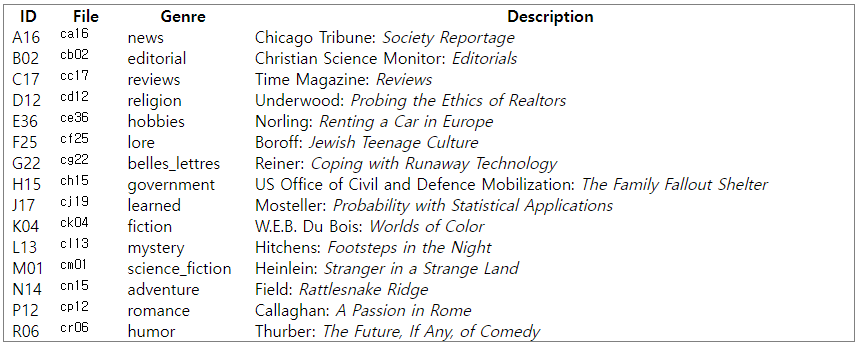


코퍼스를 단어의 리스트로 또는 문장의 리스트로 접근할 수 있다.

In [15]:
from nltk.corpus import brown
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [16]:
len(brown.words())

1161192

In [17]:
brown.words(categories='news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [18]:
brown.words(fileids=['cg22'])

['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]

In [19]:
brown.sents(categories=['news', 'editorial', 'reviews'])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

- Brown Corpus는 **문체(stylistics)** 라고 하는 일종의 언어학적 탐구인 장르 간의 체계적인 차이점을 연구하는 데 편리한 리소스
- 조동사(modal verbs) 사용에 있어 장르를 비교해 보자 - 첫 번째 단계로서, 특정 장르에 대한 카운트를 생성한다

In [20]:
from nltk.corpus import brown

news_text = brown.words(categories='news')
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
    print(m + ':', fdist[m], end=' ')

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

**<span style="color:crimson">[Your Turn]</span>** Brown Corpus의 다른 섹션을 선택해서 위의 예를 적용하여 wh 단어들(what, when, where, who, 및 why)의 빈도수를 세어보자.

다음은 관심이 있는 각 장르에 대한 count를 구하자. NLTK의 conditional frequency distributions을 사용할 것이다. 

In [21]:
cfd = nltk.ConditionalFreqDist(
            (genre, word)
            for genre in brown.categories()
            for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


# 1.4 Reuters Corpus

- 10,788 건의 뉴스, 총 1.3 백만 단어
- 90개 토픽
- 기사의 토픽을 탐지하는 모델을 위한 training 및 test 데이터셋으로 분할됨

In [22]:
from nltk.corpus import reuters
reuters.fileids()

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843',
 'test/14844',
 'test/14849',
 'test/14852',
 'test/14854',
 'test/14858',
 'test/14859',
 'test/14860',
 'test/14861',
 'test/14862',
 'test/14863',
 'test/14865',
 'test/14867',
 'test/14872',
 'test/14873',
 'test/14875',
 'test/14876',
 'test/14877',
 'test/14881',
 'test/14882',
 'test/14885',
 'test/14886',
 'test/14888',
 'test/14890',
 'test/14891',
 'test/14892',
 'test/14899',
 'test/14900',
 'test/14903',
 'test/14904',
 'test/14907',
 'test/14909',
 'test/14911',
 'test/14912',
 'test/14913',
 'test/14918',
 'test/14919',
 'test/14921',
 'test/14922',
 'test/14923',
 'test/14926',
 'test/14928',
 'test/14930',
 'test/14931',
 'test/14932',
 'test/14933',
 'test/14934',
 'test/14941',
 'test/14943',
 'test/14949',
 'test/14951',
 'test/14954',
 'test/14957',
 'test/14958',
 'test/14959',
 'test/14960',
 'test/14962',
 'test/149

In [23]:
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

- Brown Corpus와는 다르게 Reuters Corpus의 categories는 서로 겹친다
- 하나 또는 그 이상의 문서가 다루는 토픽들에 대해 알아볼 수 있으며
- 하나 또는 그 이상의 토픽에 포함된 문서가 무엇인지도 알아볼 수 있다
- 편의를 위해 corpus methods의 입력은 single fileid 또는 fileids 리스트이다

In [24]:
reuters.categories('training/9865')

['barley', 'corn', 'grain', 'wheat']

In [25]:
reuters.categories(['training/9865', 'training/9880'])

['barley', 'corn', 'grain', 'money-fx', 'wheat']

In [26]:
reuters.fileids('barley')

['test/15618',
 'test/15649',
 'test/15676',
 'test/15728',
 'test/15871',
 'test/15875',
 'test/15952',
 'test/17767',
 'test/17769',
 'test/18024',
 'test/18263',
 'test/18908',
 'test/19275',
 'test/19668',
 'training/10175',
 'training/1067',
 'training/11208',
 'training/11316',
 'training/11885',
 'training/12428',
 'training/13099',
 'training/13744',
 'training/13795',
 'training/13852',
 'training/13856',
 'training/1652',
 'training/1970',
 'training/2044',
 'training/2171',
 'training/2172',
 'training/2191',
 'training/2217',
 'training/2232',
 'training/3132',
 'training/3324',
 'training/395',
 'training/4280',
 'training/4296',
 'training/5',
 'training/501',
 'training/5467',
 'training/5610',
 'training/5640',
 'training/6626',
 'training/7205',
 'training/7579',
 'training/8213',
 'training/8257',
 'training/8759',
 'training/9865',
 'training/9958']

In [27]:
reuters.fileids(['barley', 'corn'])

['test/14832',
 'test/14858',
 'test/15033',
 'test/15043',
 'test/15106',
 'test/15287',
 'test/15341',
 'test/15618',
 'test/15648',
 'test/15649',
 'test/15676',
 'test/15686',
 'test/15720',
 'test/15728',
 'test/15845',
 'test/15856',
 'test/15860',
 'test/15863',
 'test/15871',
 'test/15875',
 'test/15877',
 'test/15890',
 'test/15904',
 'test/15906',
 'test/15910',
 'test/15911',
 'test/15917',
 'test/15952',
 'test/15999',
 'test/16012',
 'test/16071',
 'test/16099',
 'test/16147',
 'test/16525',
 'test/16624',
 'test/16751',
 'test/16765',
 'test/17503',
 'test/17509',
 'test/17722',
 'test/17767',
 'test/17769',
 'test/18024',
 'test/18035',
 'test/18263',
 'test/18482',
 'test/18614',
 'test/18908',
 'test/18954',
 'test/18973',
 'test/19165',
 'test/19275',
 'test/19668',
 'test/19721',
 'test/19821',
 'test/20018',
 'test/20366',
 'test/20637',
 'test/20645',
 'test/20649',
 'test/20723',
 'test/20763',
 'test/21091',
 'test/21243',
 'test/21493',
 'training/10120',
 'trai

비슷하게, 파일이나 카테고리 측면에서 원하는 단어나 문장을 지정할 수 있다. 이러한 각 텍스트의 첫 번째 단어는 제목이며 관례상 대문자로 저장된다.

In [28]:
reuters.words('training/9865')[:14]

['FRENCH',
 'FREE',
 'MARKET',
 'CEREAL',
 'EXPORT',
 'BIDS',
 'DETAILED',
 'French',
 'operators',
 'have',
 'requested',
 'licences',
 'to',
 'export']

In [29]:
reuters.words(['training/9865', 'training/9880'])

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

In [30]:
reuters.words(categories='barley')

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

In [31]:
reuters.words(categories=['barley', 'corn'])

['THAI', 'TRADE', 'DEFICIT', 'WIDENS', 'IN', 'FIRST', ...]

# 1.5 Inaugural Address Corpus

- Chapter 1의 섹션 1.3에서 봤던 Inaugural Address Corpus는 전체를 하나의 텍스트처럼 취급했었다
- 그러나 Inaugural Address Corpus는 55개의 텍스트, 즉, 연설문을 합친것이다
- Lexical Dispersion Plot에서 수평축은 단어로 계산된 위치 정보였다
- 그러나 Inaugural Address Corpus는 년도 정보를 담고 있다.

In [32]:
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [33]:
[fileid[:4] for fileid in inaugural.fileids()]

['1789',
 '1793',
 '1797',
 '1801',
 '1805',
 '1809',
 '1813',
 '1817',
 '1821',
 '1825',
 '1829',
 '1833',
 '1837',
 '1841',
 '1845',
 '1849',
 '1853',
 '1857',
 '1861',
 '1865',
 '1869',
 '1873',
 '1877',
 '1881',
 '1885',
 '1889',
 '1893',
 '1897',
 '1901',
 '1905',
 '1909',
 '1913',
 '1917',
 '1921',
 '1925',
 '1929',
 '1933',
 '1937',
 '1941',
 '1945',
 '1949',
 '1953',
 '1957',
 '1961',
 '1965',
 '1969',
 '1973',
 '1977',
 '1981',
 '1985',
 '1989',
 '1993',
 '1997',
 '2001',
 '2005',
 '2009',
 '2013',
 '2017',
 '2021']

- 이제 America와 citizen이라는 단어가 시간에 따라 어떻게 사용되는지 알아보자.
- america 또는 citizen으로 시작되는 모든 단어를 count할 것이다.
- 소문자로 변환해서 처리하므로 American's 과 Citizens 같은 단어도 count될 것이다.
- 문서 길이에 대해서 정규화(normalization)되지 않았다.
- `ConditionalFreqDist`에 대해서는 뒤에서 다루기로 하고 지금은 그냥 사용하자.

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
cfd = nltk.ConditionalFreqDist(
            (target, fileid[:4])
            for fileid in inaugural.fileids()
            for w in inaugural.words(fileid)
            for target in ['america', 'citizen']
            if w.lower().startswith(target))
cfd.plot(title='Figure 1.1: Plot of a Conditional Frequency Distribution')

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.8 from "C:\Users\82107\.spss\envs\nlp\python.exe"
  * The NumPy version is: "1.21.5"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed while importing _multiarray_umath: 지정된 모듈을 찾을 수 없습니다.


# 1.6 Annotated Text Corpora

- 많은 텍스트 말뭉치는 언어학적 주석을 포함하고 있다
- (예) POS tags, named entities, syntactic structures, semantic roles 등
- NLTK는 이러한 말뭉치를 손쉽게 사용할 수 있는 방법과 샘플들을 제공한다

### Table1.2  Some of the Corpora and Corpus Samples Distributed with NLTK
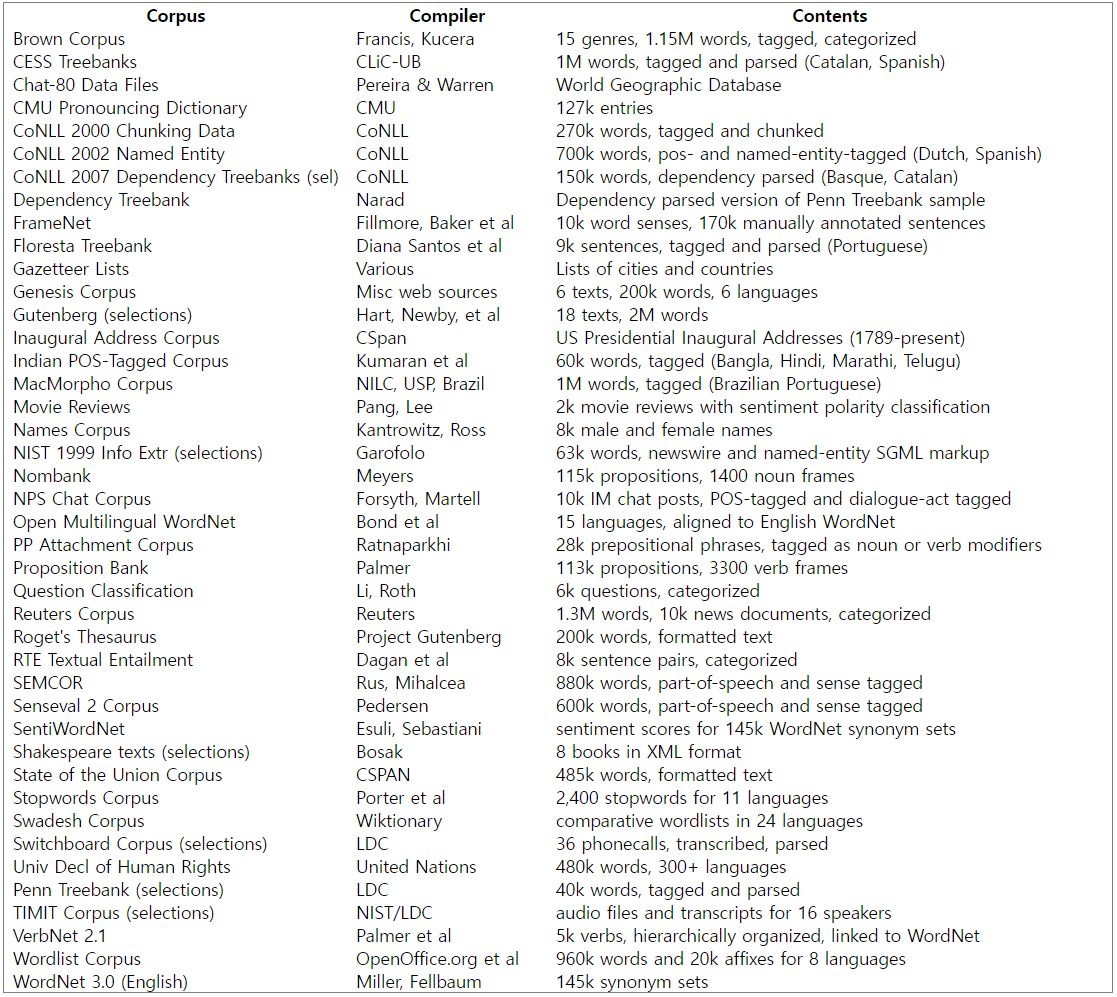

# 1.7 Corpora in Other Languages

- NLTK에서는 여러 언어의 말뭉치들을 제공한다. 사용하기 전에 문자 인코딩을 다루는 방법을 알아야 할 수도 있다
- `nltk.download()`를 사용하여 아래 cell에서 사용하려는 말뭉치를 내려받아야 한다.
   - NLTK Downloader 창에서 'Corpora' tab을 선택하고 원하는 말뭉치를 선택적으로 내려받기 한다.
- 또는 `nltk.download('말뭉치명')` 로 내려받을 수 있다 

In [35]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [36]:
# CESS-ESP Treebank: Spanish
nltk.corpus.cess_esp.words()

['El', 'grupo', 'estatal', 'Electricité_de_France', ...]

In [37]:
# Portuguese Treebank
nltk.corpus.floresta.words()

LookupError: 
**********************************************************************
  Resource [93mfloresta[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('floresta')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/floresta[0m

  Searched in:
    - 'C:\\Users\\82107/nltk_data'
    - 'C:\\Users\\82107\\.spss\\envs\\nlp\\nltk_data'
    - 'C:\\Users\\82107\\.spss\\envs\\nlp\\share\\nltk_data'
    - 'C:\\Users\\82107\\.spss\\envs\\nlp\\lib\\nltk_data'
    - 'C:\\Users\\82107\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [40]:
nltk.download('indian')

[nltk_data] Downloading package indian to
[nltk_data]     C:\Users\82107\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\indian.zip.


True

In [41]:
# Indian Language POS-Tagged Corpus: India
nltk.corpus.indian.words('hindi.pos')

['पूर्ण', 'प्रतिबंध', 'हटाओ', ':', 'इराक', 'संयुक्त', ...]

- 세계인권선언(Universal Declaration of Human Rights Corpus)은 인권의 역사에서 이정표가 되는 문서이다. 세계 모든 지역의 다양한 법적, 문화적 배경을 가진 대표자들이 초안을 작성하여 처음으로 보편적으로 보호되어야 할 기본적 인권을 제시했다. 선언문은 1948년 12월 10일 파리에서 열린 유엔 총회에서 183차 총회에서 채택되었다.
- 467 개의 언어 및 방언으로 번역되었으며, 언어 목록은 [여기](https://unicode.org/udhr/translations.html)를 참조하시오.
- 이 말뭉치의 fields에는 `UTF8`이나 `Latin1` 같은 글자 인코딩에 대한 정보가 들어 있다.

In [42]:
# Universal Declaration of Human Rights Corpus
nltk.corpus.udhr.fileids()

['Abkhaz-Cyrillic+Abkh',
 'Abkhaz-UTF8',
 'Achehnese-Latin1',
 'Achuar-Shiwiar-Latin1',
 'Adja-UTF8',
 'Afaan_Oromo_Oromiffa-Latin1',
 'Afrikaans-Latin1',
 'Aguaruna-Latin1',
 'Akuapem_Twi-UTF8',
 'Albanian_Shqip-Latin1',
 'Amahuaca',
 'Amahuaca-Latin1',
 'Amarakaeri-Latin1',
 'Amuesha-Yanesha-UTF8',
 'Arabela-Latin1',
 'Arabic_Alarabia-Arabic',
 'Asante-UTF8',
 'Ashaninca-Latin1',
 'Asheninca-Latin1',
 'Asturian_Bable-Latin1',
 'Aymara-Latin1',
 'Balinese-Latin1',
 'Bambara-UTF8',
 'Baoule-UTF8',
 'Basque_Euskara-Latin1',
 'Batonu_Bariba-UTF8',
 'Belorus_Belaruski-Cyrillic',
 'Belorus_Belaruski-UTF8',
 'Bemba-Latin1',
 'Bengali-UTF8',
 'Beti-UTF8',
 'Bichelamar-Latin1',
 'Bikol_Bicolano-Latin1',
 'Bora-Latin1',
 'Bosnian_Bosanski-Cyrillic',
 'Bosnian_Bosanski-Latin2',
 'Bosnian_Bosanski-UTF8',
 'Breton-Latin1',
 'Bugisnese-Latin1',
 'Bulgarian_Balgarski-Cyrillic',
 'Bulgarian_Balgarski-UTF8',
 'Cakchiquel-Latin1',
 'Campa_Pajonalino-Latin1',
 'Candoshi-Shapra-Latin1',
 'Caquinte-Latin

In [43]:
nltk.corpus.udhr.words('Javanese-Latin1')[11:]

['Saben', 'umat', 'manungsa', 'lair', 'kanthi', 'hak', ...]

udhr corpus에 포함된 각 언어별 단어 길이에 대해서 conditional frequency distribution를 사용해서 살펴보자.

In [44]:
from nltk.corpus import udhr
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
languages = ['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
            (lang, len(word))
            for lang in languages
            for word in udhr.words(lang + '-Latin1'))
cfd.plot(cumulative=True)

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.8 from "C:\Users\82107\.spss\envs\nlp\python.exe"
  * The NumPy version is: "1.21.5"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed while importing _multiarray_umath: 지정된 모듈을 찾을 수 없습니다.


**<span style="color:crimson">[ERROR]</span>** 책에는 출력된 그림에서 누적 빈도가 Percentage로 표시되었으나 우리 출력에는 count로 되어있다. Percentage로 보는 것이 타당해보인다. Percentage로 표시할 수 있는 별도의 함수를 정의하여 책과 동일하게 출력되도록 해보자.

In [45]:
from nltk.corpus import udhr
import pandas as pd

languages = ['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']

cfd = nltk.ConditionalFreqDist(
            (lang, len(word))
            for lang in languages
            for word in udhr.words(lang + '-Latin1'))

def plot_freq(lang):
    max_length = max([len(word) for word in udhr.words(lang + '-Latin1')])
    eng_freq_dist = {}

    for i in range(max_length + 1):
        eng_freq_dist[i] = cfd[lang].freq(i)

    ed = pd.Series(eng_freq_dist, name=lang)

    ed.cumsum().plot(legend=True, title='Figure 1.2: Cumulative Word Length Distributions')

ImportError: Unable to import required dependencies:
numpy: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.8 from "C:\Users\82107\.spss\envs\nlp\python.exe"
  * The NumPy version is: "1.21.5"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed while importing _multiarray_umath: 지정된 모듈을 찾을 수 없습니다.


In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))

for lang in languages:
    plot_freq(lang)

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.8 from "C:\Users\82107\.spss\envs\nlp\python.exe"
  * The NumPy version is: "1.21.5"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed while importing _multiarray_umath: 지정된 모듈을 찾을 수 없습니다.


UDHR의 6개국어 번역본을 처리했다. 길이가 5 글자 또는 그 이하의 단어들이 Ibibio 텍스트에서는 약 80%, 독일 텍스트에서는 약 60%, 그리고 Inuktitut 텍스트에서는 약 25%를 차지한다.

**<span style="color:crimson">[Your Turn]</span>** `udhr.fileids()`에서 언어를 하나 선택하고 `raw_text = udhr.raw('언어-Latin1')` 라고 변수를 정의하시오. 그런 다음 `nltk.FreqDist(raw_text).plot()`를 사용하여 글자들의 frequency distribution 그래프를 그리시오

In [47]:
udhr.fileids()

['Abkhaz-Cyrillic+Abkh',
 'Abkhaz-UTF8',
 'Achehnese-Latin1',
 'Achuar-Shiwiar-Latin1',
 'Adja-UTF8',
 'Afaan_Oromo_Oromiffa-Latin1',
 'Afrikaans-Latin1',
 'Aguaruna-Latin1',
 'Akuapem_Twi-UTF8',
 'Albanian_Shqip-Latin1',
 'Amahuaca',
 'Amahuaca-Latin1',
 'Amarakaeri-Latin1',
 'Amuesha-Yanesha-UTF8',
 'Arabela-Latin1',
 'Arabic_Alarabia-Arabic',
 'Asante-UTF8',
 'Ashaninca-Latin1',
 'Asheninca-Latin1',
 'Asturian_Bable-Latin1',
 'Aymara-Latin1',
 'Balinese-Latin1',
 'Bambara-UTF8',
 'Baoule-UTF8',
 'Basque_Euskara-Latin1',
 'Batonu_Bariba-UTF8',
 'Belorus_Belaruski-Cyrillic',
 'Belorus_Belaruski-UTF8',
 'Bemba-Latin1',
 'Bengali-UTF8',
 'Beti-UTF8',
 'Bichelamar-Latin1',
 'Bikol_Bicolano-Latin1',
 'Bora-Latin1',
 'Bosnian_Bosanski-Cyrillic',
 'Bosnian_Bosanski-Latin2',
 'Bosnian_Bosanski-UTF8',
 'Breton-Latin1',
 'Bugisnese-Latin1',
 'Bulgarian_Balgarski-Cyrillic',
 'Bulgarian_Balgarski-UTF8',
 'Cakchiquel-Latin1',
 'Campa_Pajonalino-Latin1',
 'Candoshi-Shapra-Latin1',
 'Caquinte-Latin

In [48]:
plt.figure(figsize=(16, 8))
raw_text = udhr.raw('Spanish-Latin1')
nltk.FreqDist(raw_text).plot()

NameError: name 'plt' is not defined

# 1.8 Text Corpus Structure

### Figure 1.3: Common Structures for Text Corpora
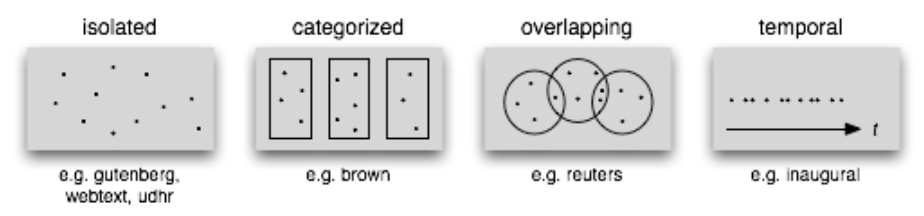

### Table 1.3: Basic Corpus Functionality defined in NLTK
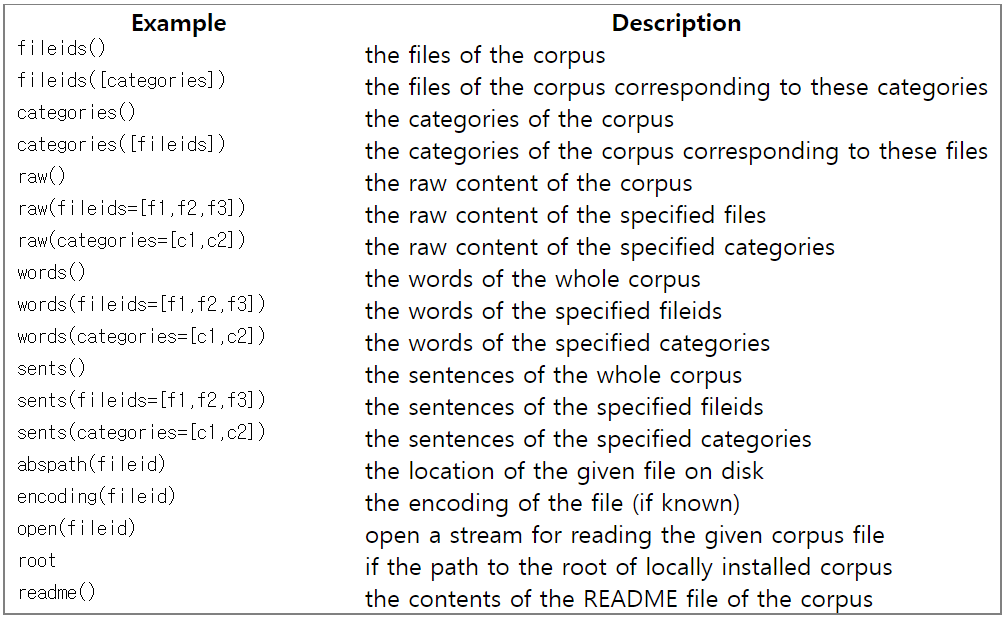

NLTK's corpus reader들은 새로운 말뭉치에도 사용할 수 있다. 다음 코드는 일부 말뭉치 접근 방법들의 차이점을 보여준다.

In [ ]:
raw = gutenberg.raw("burgess-busterbrown.txt")
raw[1:20]

In [ ]:
words = gutenberg.words("burgess-busterbrown.txt")
words[1:20]

In [ ]:
sents = gutenberg.sents("burgess-busterbrown.txt")
sents[1:20]

# 1.9 Loading your own Corpus

- NLTK의 각종 방법을 사용하여 자기 자신의 말뭉치에 접근해보자
- 데이터 로드: `PlaintextCorpusReader`
- 데이터가 있는 디렉토리를 `corpus_root`로 지정한다.
-

In [ ]:
import os
corpus_root = os.getcwd() + '\\data\\chp4'
corpus_root

In [ ]:
from nltk.corpus import PlaintextCorpusReader

wordlists = PlaintextCorpusReader(corpus_root, '.*')
wordlists.fileids()

In [ ]:
wordlists.words('botchan.txt')

<br><br>
<span style="font-size:2.5em; line-height:36px"><strong>2. Conditional Frequency Distributions
</strong></span>
<br><br>

Chapter 1의 Section 3.1에서 다룬 Frequency Distribution과는 다르게, 
말뭉치가 여러 범주별로 구분되어 있을 때, 각 범주별 Frequency Distribution를 계산할 필요가 있을 수 있다. 이를 통해 범주 간 계통적 차이를 조사할 수 있다. 이것은 이전 섹션에서 별도의 설명 없이 다루었던 NLTK의 ConditionalFreqDist data type을 사용해서 구현할 수 있다.
Conditional Frequency Distribution은 각기 다른 조건(예: 텍스트의 범주)별 Frequency Distribution들의 collection이다.   

# 2.1 Conditions and Events
Conditional Frequency Distribution은 각 event를 condition과 짝을 지어주어야 한다. 따라서 단어 시퀀스 대신 pair sequence를 처리해야 한다. 

In [ ]:
# A sequence of words
text = ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

# A sequence of pairs
pairs = [('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ...]

각 pair는 `(condition, event)`의 형식을 갖는다. 위 Section 1.3의 Brown Corpus를 장르별로 다뤘다면 15개의 condition(genre)과 1,161,192 개의 event(word)가 있었을 것이다.

# 2.2 Counting Words by Genre

In [49]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
            (genre, word)
            for genre in brown.categories()
            for word in brown.words(categories=genre))

이를 분해하여 news와 romans의 두 가지 장르만 살펴보자.

In [ ]:
genre_word = [(genre, word)
                for genre in ['news', 'romance']
                for word in brown.words(categories=genre)]
len(genre_word)

In [ ]:
genre_word[:4]

In [ ]:
genre_word[-4:]

이 pair 리스트를 사용하여 ConditionalFreqDist를 생성할 수 있으며 변수 `cfd`로 저장하자.

In [ ]:
cfd = nltk.ConditionalFreqDist(genre_word)
cfd

In [ ]:
cfd.conditions()

In [ ]:
print(cfd['news'])

In [ ]:
print(cfd['romance'])

In [ ]:
cfd['romance'].most_common(20)

In [ ]:
cfd['romance']['could']

# 2.3 Plotting and Tabulating Distributions

앞의 그림 Figure 1.1 과 Figure 1.2에서 `condition`와 `event`가 무엇인지 생각해보자.  
<br>
`plot()`과 `tabulate()` methods에서  
- `condition=파라미터` 로 표시할 조건을 지정할 수 있다
- `samples=파라미터`로 표시할 샘플들에 제한을 줄 수도 있다
- 이러한 방법을 통해 대량의 데이터를 conditional frequency distribution으로 로드한 다음, 선택된 `condition`과 `samples`를 `plot()`하거나 `tabulate()`할 수 있다. 

In [ ]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
            (lang, len(word))
            for lang in languages
            for word in udhr.words(lang + '-Latin1'))

In [ ]:
cfd.tabulate(conditions=['English', 'German_Deutsch'], samples=range(10), cumulative=True)

출력된 맨 오른쪽 윗줄에서 '9'를 보자: 영어 텍스트에서 1,638개의 단어가 길이가 9 이하라는 것을 의미한다.  

**<span style="color:crimson">[Your Turn]</span>** Brown Corpus에서 news 및 romans 장르에 대해, 일주일 중 어떤 요일이 가장 뉴스거리가 많은지 또 가장 로맨틱한지 찾아보자. 변수 `days`는 일주일의 요일 즉, ['Monday', ...]로 정의한다. 단어를 `cfd.tabulate(samples=days)`를 사용하요 표시하시오. `tabulate` 대신 `plot`을 사용해보시오. 표시되는 요일의 순서는 추가적인 파라미터 `samples=['Monday', ...]`를 사용하여 조절할 수 있을 것이다.

# 2.4 Generating Random Text with Bigrams
- conditional frequency distribution을 사용하여 bigrams(word pairs) 표를 만들 수도 있다.
- 각 word pair에서 앞단어를 condition으로, 뒷단어를 event로 보고 분포를 생성할 수도 있다.

In [ ]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.']
list(nltk.bigrams(sent))

In [ ]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()

text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)  # [_bigram-condition]

In [ ]:
cfd['living']

In [ ]:
generate_model(cfd, 'living')

### Table 2.1:
NLTK's Conditional Frequency Distributions: commonly-used methods and idioms for defining, accessing, and visualizing a conditional frequency distribution of counters.
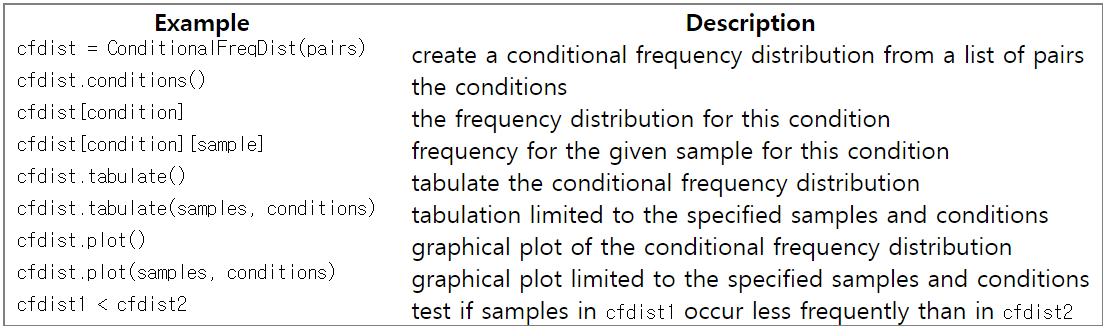

<br><br>
<span style="font-size:2.5em; line-height:36px"><strong>3. More Python: Reusing Code
</strong></span>
<br><br>


<br><br>
<span style="font-size:2.5em; line-height:36px"><strong>4. Lexical Resources
</strong></span>
<br><br>

- **Lexicon**(lexical resource): 품사명 및 의미 정의 등과 같은 정보가 있는 words and/or phrases의 모음
- lexical resource는 텍스트의 부속물일 뿐이며 텍스트에 의해서 생성되고 풍부해진다.
- 만일 텍스트 `my_text`를 정의했다면, `vocab = sorted(set(my_text))`와 `word_freq = FreqDist(my_text)`는 각각 `my_text`의 어휘와 단어 빈도를 나타내는 lexical resourse 이다.
- Lexicon 관련 용어:
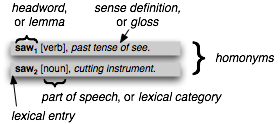

# 4.1   Wordlist Corpora

- NLTK에는 wordlist 일 뿐인 몇 가지 말뭉치가 포함되어 있다.
- Word Corpus는 Unix에서 가져온 파일로서, 몇몇 spell checker에서 사용된다.

In [ ]:
len(nltk.corpus.words.words())

In [ ]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

In [ ]:
unusual_words(nltk.corpus.nps_chat.words())

In [ ]:
len(nltk.corpus.gutenberg.words('austen-sense.txt'))

In [ ]:
len(unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt')))

- 텍스트를 처리하기 전에 "to"나 "the"와 같은 자주 등장하는 단어를 걸러내려면, NLTK가 제공하는 **stopwords(불용어) 말뭉치**를 사용한다.
- 불용어는 일반적으로 어휘적 내용이 거의 없으며 텍스트에서 불용어들은 서로 구별되지 않는다.

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

In [ ]:
len(stopwords.words('english'))

In [ ]:
def content_fraction(text): 
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content) / len(text)

In [ ]:
content_fraction(nltk.corpus.reuters.words())

nltk.corpus.stopwords를 통해 텍스트 단어의 약 27% 가 걸러졌다.

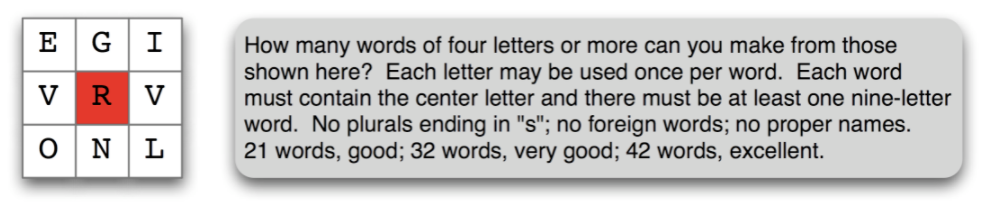


- wordlist 형태의 말뭉치는 단어퍼즐(그림은 "Target"이라고 부르는 퍼즐)을 푸는데 유용하다. 모든 단어를 반복하고 각각의 단어에 대해 조건이 충족되는지 여부를 확인한다.

In [ ]:
puzzle_letters = nltk.FreqDist('egivrvonl')
obligatory = 'r'
wordlist = nltk.corpus.words.words()
[w for w in wordlist if len(w) >= 6  # 길이 조건
                     and obligatory in w # 필수 문자
                     and nltk.FreqDist(w) <= puzzle_letters] # 문자 빈도 확인

`Names corpus` : 성별에 따라 분류된 8000개의 이름(first name)을 포함하고, 남성과 여성의 이름은 별도의 파일에 저장된다.

In [ ]:
names = nltk.corpus.names
names.fileids()

In [ ]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')
[w for w in male_names if w in female_names]

이름의 끝글자 별 분포를 살펴보자. 무엇을 알 수 있는가?

In [ ]:
plt.figure(figsize=(20, 8))
cfd = nltk.ConditionalFreqDist(
            (fileid, name[-1]) # name[-1] : 이름의 마지막 글자
            for fileid in names.fileids()
            for name in names.words(fileid))
cfd.plot()

# 4.2   A Pronouncing Dictionary

- 약간 더 풍부한 lexical resource로서, 단어와 그 단어에 대한 속성들을 표 형식으로 정리한 것이 있다.
- NLTK는 미국 영어 CMU Pronouncing dict 을 포함하고 있다.
- [Wikipedia]: The CMU Pronouncing Dictionary (also known as CMUdict) is an open-source pronouncing dictionary originally created by the Speech Group at Carnegie Mellon University (CMU) for use in speech recognition research.
- 음성인식, TTS 등에 사용됨

In [ ]:
entries = nltk.corpus.cmudict.entries()
len(entries)

In [ ]:
for entry in entries[42371:42379]:
    print(entry)

- 각 단어에 대한 음성 기호 목록을 보여준다.
- CMUDict의 기호들은 Arpabet에서 가져온 것이며, 자세한 것은 http://en.wikipedia.org/wiki/Arpabet 을 참조하시오

In [ ]:
for word, pron in entries: 
    if len(pron) == 3: # 3개의 음성(phone)으로 구성된 발음을 가진 엔트리 확인
        ph1, ph2, ph3 = pron # 조건이 참인 경우, ph1, ph2, ph3로 할당
        if ph1 == 'P' and ph3 == 'T':
            print(word, ph2, end=' ')

- 다음은 'nicks' 처럼 들리는 음절로 끝나는 단어 찾기이다.
- 이 방법을 사용하여 단어의 운을 맞출(rhyming) 수도 있다.

In [ ]:
syllable = ['N', 'IH0', 'K', 'S']
[word for word, pron in entries if pron[-4:] == syllable]

- 한 가지 발음이 여러가지 철자로 씌여졌다: nics, niks, nix, ntic's, ...
- 여기서 ntic's는 Atlantic's에서 t가 묵음이므로 포함된 것이다.
- 이와 같이 발음과 표기가 다른 것들을 찾아보자.
- 다음 예제 코드의 목적을 간략히 설명하고, 그것이 어떻게 동작하는 지 설명할 수 있겠는가?

In [ ]:
[w for w, pron in entries if pron[-1] == 'M' and w[-1] == 'n']

In [ ]:
sorted(set(w[:2] for w, pron in entries if pron[0] == 'N' and w[0] != 'n'))

- 음성(phone)들에는 제1강세(1), 제2강세(2) 및 강세없음(0)을 나타내는 숫자가 포함되어 있다. 
- 강세 숫자를 추출하는 함수를 정의하고 어휘를 스캔하여 특정 강세 패턴을 가진 단어를 찾는다.

In [ ]:
def stress(pron):
    return [char for phone in pron for char in phone if char.isdigit()]

In [ ]:
[w for w, pron in entries if stress(pron) == ['0', '1', '0', '2', '0']]

In [ ]:
[w for w, pron in entries if stress(pron) == ['0', '2', '0', '1', '0']]

- Conditional frequency distribution을 사용하여 발음이 가장 적게 대비되는(발음이 가장 유사한) 단어들을 찾을 수 있다
- 세 개의 발음으로 구성된 모든 발음-단어 매치를 찾고 처음과 끝 발음에 따라 그룹화 한다.

In [ ]:
p3 = [(pron[0]+'-'+pron[2], word) # p1과 p3 그룹화
      for (word, pron) in entries
      if pron[0] == 'P' and len(pron) == 3]  # 3개의 소리로 구성된 p-words 찾기

cfd = nltk.ConditionalFreqDist(p3)

for template in sorted(cfd.conditions()):
    if len(cfd[template]) > 10:
        words = sorted(cfd[template])
        wordstring = ' '.join(words)
        print(template, wordstring[:70] + "...")

- 사전 전체를 반복하는 것이 아니라 특정 단어를 찾아보는 것도 가능하다.
- Python의 disctionary 데이터구조와 그 key 값을 사용해서 사전을 찾아볼 수 있다 

In [ ]:
prondict = nltk.corpus.cmudict.dict()
prondict['fire']

In [ ]:
prondict['blog'] # 존재하지 않는 key를 입력하는 경우 keyerror가 표시됨.

In [ ]:
prondict['blog'] = [['B', 'L', 'AA1', 'G']] # key에 대한 value를 할당한다.
prondict['blog']

- Lexical resource를 사용해서, 예를 들어, 어떤 어휘론적 속성(예: 명사)을 갖는 단어들을 걸러내는 것 같은 텍스트 처리를 할 수 있다
- 다음의 TTS(Text-To-Speech) 함수는 pronunciation dictionary 에서 text내 각 단어를 검색한다.

In [ ]:
text = ['natural', 'language', 'processing']
[ph for w in text for ph in prondict[w][0]]

# 4.3   Comparative Wordlists

- **comparative wordlist**: 또다른 표 형식의 lexicon
- NLTK에는 Swadesh list라고 하는 여러 언어로 된 200여 개의 공통 단어 목록이 포함되어 있다.
- 언어학자인 Morris Swadesh가 만듬. 어휘통계학 및 언어연대학 용도로 사용됨. 
- 언어는 ISO 639 2-글자 code로 식별.

In [ ]:
from nltk.corpus import swadesh
swadesh.fileids()

`entries()` 메서드로 언어 목록을 지정하여 여러 언어의 동일족 단어(cognate words)에 접근할 수 있다. 나아가 이것을 간단한 사전으로 변환할 수도 있다.

In [ ]:
swadesh.words('en')

In [ ]:
fr2en = swadesh.entries(['fr', 'en'])
fr2en

In [ ]:
translate = dict(fr2en)
translate['chien']

In [ ]:
translate['jeter']

- 다른 소스 언어를 추가하여 심플한 번역기를 더욱 유용하게 사용할 수 있다. 독일어-영어 및 스페인어-영어 쌍을 가져오고 dict()를 사용하여 각각 사전으로 변환한 후 다음과 같은 매핑으로 원본 번역 사전을 업데이트한다.

In [ ]:
de2en = swadesh.entries(['de', 'en'])    # German-English
es2en = swadesh.entries(['es', 'en'])    # Spanish-English
translate.update(dict(de2en))
translate.update(dict(es2en))

In [ ]:
translate['Hund']

In [ ]:
translate['perro']

- 여러 게르만어와 로망스어의 단어를 비교.

In [ ]:
languages = ['en', 'de', 'nl', 'es', 'fr', 'pt', 'la']
for i in [139, 140, 141, 142]:
    print(swadesh.entries(languages)[i])

# 4.4   Shoebox and Toolbox Lexicons

- `Toolbox` file 은 언어학자들이 가장 자주 사용하는 도구이며, 
- 실무 언어학자들이 사용해 온 파일 카드들로 구성된 전통적인 shoebox를 대체하므로 `Shoebox`라고도 한다.
- Toolbox는 http://www.sil.org/computing/toolbox/ 에서 내려 받을 수 있다.
- Toolbox는 entries 의 모음으로 구성되며 각 항목은 하나 이상의 필드로 구성된다.
- 대부분의 필드는 선택적이거나 반복 가능한데, 이것은 이러한 lexical resource가 표 또는 스프레드싯 같은 형식으로 다뤄질 수 없다는 것을 의미한다.

In [ ]:
from nltk.corpus import toolbox
toolbox.entries('rotokas.dic') # 로토카스어 사전 



엔트리는 음성 부분이 'V'(동사)임을 나타내는 'ps', 'V', 글로스-인-영어가 'gag'임을 나타내는 'ge', 'gag'와 같은 일련의 속성-값 쌍으로 구성됩니다. 마지막 세 쌍은 로토카어로 된 예문과 톡 피신과 영어로 번역된 문장을 포함하고 있다.


<br><br>
<span style="font-size:2.5em; line-height:36px"><strong>5. WordNet
</strong></span>
<br><br>

NLTK에는 영어 WordNet이 포함되어 있으며, 155,287개의 단어와 117,659개의 동의어 세트가 포함되어 있다.

# 5.1   Senses and Synonyms

	
a.		Benz is credited with the invention of the motorcar.

b.		Benz is credited with the invention of the automobile.

motorcar 와 automobile은 동의어다. WordNet을 사용하여 이러한 단어를 살펴볼 수 있다.

In [ ]:
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

'motorcar'는 자동차라는 하나의 의미를 가지고 있다. 

`car.n.01`은 synset 혹은 synonomy set으로 불린다.

In [ ]:
wn.synset('car.n.01').lemma_names()

자동차는 기차, 곤돌라 또는 엘리베이터 칸 등 여러가지 의미를 나타낸다.

In [ ]:
wn.synset('car.n.01').definition()

In [ ]:
wn.synset('car.n.01').examples()

In [ ]:
wn.synset('car.n.01').lemmas() # 특정 synset에서 lemma를 가져온다

In [ ]:
wn.lemma('car.n.01.automobile') # lemma를 조회한다

In [ ]:
wn.lemma('car.n.01.automobile').synset() # lemma에 해당하는 synset 가져온다

In [ ]:
wn.lemma('car.n.01.automobile').name() # 보조항목을 이름으로 가져온다

'car' 라는 단어는 5개의 synset이 있어서 의미가 모호하다.

In [ ]:
wn.synsets('car')

In [ ]:
for synset in wn.synsets('car'):
    print(synset.lemma_names())

In [ ]:
wn.lemmas('car')

**<span style="color:crimson">[Your Turn]</span>** 당신이 생각할 수 있는 모든 단어 요리의 감각을 적으세요. WordNet의 도움을 받아 앞에서 사용한 것과 동일한 연산을 사용하여 이 단어를 살펴보십시오.

# 5.2   The WordNet Hierarchy



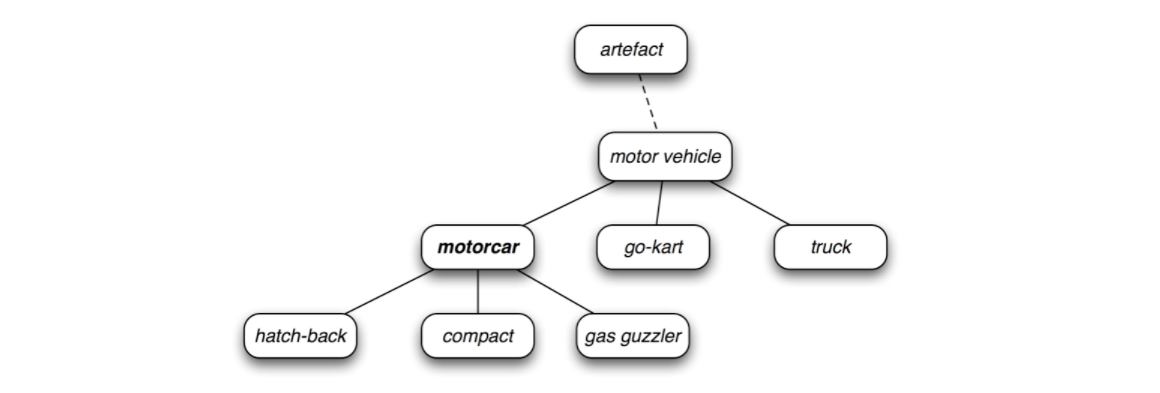


WordNet synset은 추상적인 개념에 대응하고 있으며, 영어에 대응하는 단어가 항상 있는 것은 아니다. 이러한 개념은 계층으로 서로 연결되어 있습니다.WordNet을 사용하면 개념 사이를 쉽게 이동할 수 있다. 예를 들어, 자동차와 같은 개념이 주어지면, 우리는 보다 구체적인 개념을 볼 수 있다.

In [ ]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar[0]

In [ ]:
sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas())

여러 가지 방법으로 분류할 수 있기 때문에 여러 개의 경로가 있는 단어도 있다. wheelled_vehicle.n.01은 차량과 컨테이너로 분류될 수 있기 때문에 car.n.01과 entity.n.01 사이에는 두 가지 경로가 있다.

In [ ]:
motorcar.hypernyms()

In [ ]:
paths = motorcar.hypernym_paths()

In [ ]:
len(paths)

In [ ]:
[synset.name() for synset in paths[0]]

In [ ]:
[synset.name() for synset in paths[1]]

In [ ]:
motorcar.root_hypernyms()

**<span style="color:crimson">[Your Turn]</span>** NLTK의 편리한 그래피컬 WordNet 브라우저 `nltk.app.wordnet()`을 사용해 보십시오. hypernym 링크와 하이네임 링크에 따라 WordNet 계층을 탐색합니다.

# 5.3   More Lexical Relations

In [ ]:
wn.synset('tree.n.01').part_meronyms()

`tree.n.01` 는 `heartwood.n.01` 와 `sapwood.n.01` 를 포함한다

In [ ]:
wn.synset('tree.n.01').substance_meronyms()

In [ ]:
wn.synset('tree.n.01').member_holonyms()

In [ ]:
for synset in wn.synsets('mint', wn.NOUN):
    print(synset.name() + ':', synset.definition())

 mint.n.04는 mint.n.02의 일부이며 mint.n.05의 원료가 되는 물질임을 알 수 있다.

In [ ]:
wn.synset('mint.n.04').part_holonyms()

In [ ]:
wn.synset('mint.n.04').substance_holonyms()

동사간에도 관계가 있다. 예를 들어, 걷는 행위는 밟는 행위이기 때문에 걷는 것은 밟는 것을 수반한다. 일부 동사에는 여러 개의 동사가 있다.

In [ ]:
wn.synset('walk.v.01').entailments()

In [ ]:
wn.synset('eat.v.01').entailments()

In [ ]:
wn.synset('tease.v.03').entailments()

반의어 관계

In [ ]:
wn.lemma('supply.n.02.supply').antonyms()

In [ ]:
wn.lemma('rush.v.01.rush').antonyms()

In [ ]:
wn.lemma('horizontal.a.01.horizontal').antonyms()

In [ ]:
wn.lemma('staccato.r.01.staccato').antonyms()

# 5.4   Semantic Similarity

특정 synset을 지정하면 WordNet 네트워크를 경유하여 관련 의미를 가진 synset을 찾을 수 있다. 어떤 단어가 의미론적으로 관련되어 있는지 아는 것은 텍스트 모음의 인덱싱에 도움이 된다. 예를들어, 자동차와 같은 일반적인 용어를 검색하면 리무진과 같은 특정 용어를 포함하는 문서와 일치한다.

In [ ]:
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')

우리는 고래가 매우 특이하다는 것을 알고 있다. 반면 척추동물은 더 일반적이고 개체는 완전히 일반적이다. 각 Synset의 깊이를 조사함으로써 이 범용성의 개념을 수치화할 수 있습니다.

In [ ]:
right.lowest_common_hypernyms(minke)

In [ ]:
right.lowest_common_hypernyms(orca)

In [ ]:
right.lowest_common_hypernyms(tortoise)

In [ ]:
right.lowest_common_hypernyms(novel)

In [ ]:
wn.synset('baleen_whale.n.01').min_depth()

In [ ]:
wn.synset('whale.n.02').min_depth()

In [ ]:
wn.synset('vertebrate.n.01').min_depth()

WordNet synset 컬렉션에 대해 유사성 척도가 정의되어 있다. 

`path_samilarity`는 하이퍼나임 계층의 개념을 연결하는 최단 경로를 기반으로 0 ~1 범위의 점수를 할당. (경로를 찾을 수 없는 경우에는 1이 반환됩니다).

In [ ]:
right.path_similarity(minke)

In [ ]:
right.path_similarity(orca)

In [ ]:
right.path_similarity(tortoise)

In [ ]:
right.path_similarity(novel)

참고래를 밍크고래, 범고래, 거북이, 소설과 관련지어 다음과 같은 유사성 점수결과, 무생물로 이동함에 따라 감소한다.